# Introduciton to Convolutional Neural Network and computer vision with TensorFlow

computer vision is the practise of writing algorithms which can discover patterns in visual data.such as the camera of self-driving car to recognise the car infornt.

# GET the DATA

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip the downlloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-18 16:54:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   256MB/s    in 0.4s    

2024-07-18 16:54:14 (256 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with data)

A very crucial step at the beginning of the any machine learning project is becoming one with the data.
and for a computer vision project .... this usually means visualizing many samples of the data.

In [ ]:
ls pizza_steak

test/  train/


In [ ]:
ls pizza_steak/train

pizza/  steak/


In [ ]:
ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

there are 2 directories and 0 images in pizza_steak.
there are 2 directories and 0 images in pizza_steak/test.
there are 0 directories and 250 images in pizza_steak/test/steak.
there are 0 directories and 250 images in pizza_steak/test/pizza.
there are 2 directories and 0 images in pizza_steak/train.
there are 0 directories and 750 images in pizza_steak/train/steak.
there are 0 directories and 750 images in pizza_steak/train/pizza.


In [ ]:
# we can count images from folder without using the long code ,we wrote above
print(f"images in train dir: {len(os.listdir('pizza_steak/train/pizza'))+len(os.listdir('pizza_steak/train/steak'))}\nimages in test dir: {len(os.listdir('pizza_steak/test/pizza'))+len(os.listdir('pizza_steak/test/steak'))}")

images in train dir: 1500
images in test dir: 500


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import random
def view_random_image(target_dir,target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = plt.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape:{img.shape}")
  return img

image shape:(512, 512, 3)


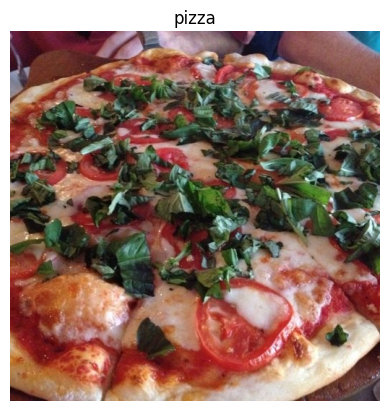

In [ ]:
img=view_random_image(target_dir="pizza_steak/train",target_class="pizza")

## **🔑NOTE: ** Tensorflow or machine learning methods/models always wants tensor in normalized form , so we have to normalize the image(between 0 & 1)
so let's build an end to end example with preprocessing

## An End to End Example

Let's build a convolutional neural network to find patterns in our images,
more specifically we need a way to:
* Load our images
* Preprocess our images
* create a model to find patterns in our images
* compile a CNN model
* Fit the CNN model to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

#preprocess the data using tensorflow functions
train_datagen = ImageDataGenerator(rescale = 1./255) # it normalizes the data
valid_datagen = ImageDataGenerator(rescale = 1./255)

# let's load the data from directory and convert into batches

train_data = train_datagen.flow_from_directory(directory ="pizza_steak/train",
                                               batch_size = 32,

                                               class_mode = "binary",
                                               seed = 42) # since class is binary and compressing the image size to (224,224)

valid_data = valid_datagen.flow_from_directory(directory = "pizza_steak/test",
                                               batch_size = 32,

                                               class_mode = "binary",
                                               seed = 42)

# create the model

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters = 10,
                                   kernel_size = 3,
                                   activation = "relu",
                                   input_shape = (256,256,3)))
model_1.add(tf.keras.layers.Conv2D(10,3,activation = "relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                      padding = "valid"))
model_1.add(tf.keras.layers.Conv2D(10,3,activation = "relu"))
model_1.add(tf.keras.layers.Conv2D(10,3,activation = "relu"))
model_1.add(tf.keras.layers.MaxPool2D(2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1,activation = "sigmoid"))


# compie the cnn model

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# fit the model

history_1 = model_1.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs = 5,
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 159ms/step - loss: 0.6204 - accuracy: 0.6600 - val_loss: 0.4642 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4392 - accuracy: 0.8093 - val_loss: 0.4010 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3782 - accuracy: 0.8373 - val_loss: 0.3500 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3087 - accuracy: 0.8707 - val_loss: 0.3149 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 13s 273ms/step - loss: 0.2500 - accuracy: 0.9033 - val_loss: 0.4483 - val_accuracy: 0.8020


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_36 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 126, 126, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 conv2d_38 (Conv2D)          (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 61, 61, 10)        0         
 ng2D)                                                

In [ ]:
img, lab = train_data.next()

In [ ]:
img.shape

(32, 256, 256, 3)

In [ ]:
img[0].shape

(256, 256, 3)

# Let's breakdown the process

## 1. Become One with data

In [ ]:

# let's visulaize the data

# let's create an overall function to visualize the images from any folder and view them(which are in jpeg format or image format)



def view_images(target_dir, target_class = None , number_of_images = 10):
  """
  This function takes target_directory , target_class (if there) as input in which images are in jpeg , jpg or png format
  """

  import os
  import numpy as np
  import matplotlib.pyplot as plt
  import random
  import pathlib
  data_dir = pathlib.Path(target_dir)
  class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
  if target_class is None:
    target_class = random.choice(class_names)
  target_folder  = str(data_dir) + '/' + target_class
  images = random.sample(os.listdir(target_folder),number_of_images+1)
  plt.figure(figsize=(15, number_of_images))
  for i in range(number_of_images):
    img = plt.imread(target_folder + '/' + images[i])
    plt.subplot(round(number_of_images/5) , 5 , i+1)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
  return img

In [ ]:
img = view_images(target_dir = "pizza_steak/train" ,target_class = "steak", number_of_images=20)

Output hidden; open in https://colab.research.google.com to view.

## 2. PreProcessing the Data

> Since tensorflow works on **tensors** we have to transfer images into tensors and better to do **scaling/normalizing** them before feeding them into model

In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#create classes
train_dir =pathlib.Path("pizza_steak/train")
test_dir =pathlib.Path("pizza_steak/test")
class_names = np.array(sorted(item.name for item in train_dir.glob('*')))

train_datagen = ImageDataGenerator(rescale =1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed =42)

test_data  = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size =32,
                                               class_mode = "binary",
                                               seed= 42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images ,labels = train_data.next()

In [ ]:
images[0] , labels[0]

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

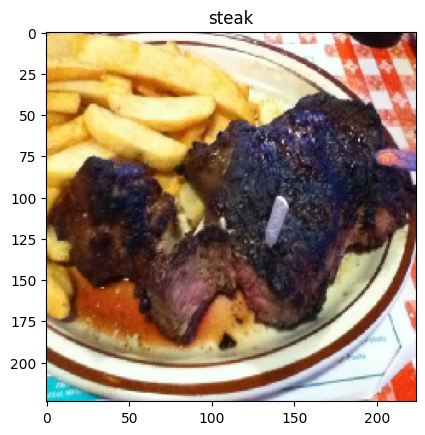

In [ ]:
plt.imshow(images[1]);
plt.title(class_names[int(labels[1])]);

In [ ]:
class_names[0]

'pizza'

## 3.Create the model

In [ ]:
# let's create the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam


model_2 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3, # less kernel size is better because it takes more data
           activation ="relu",
           input_shape =(224,224,3)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation ="sigmoid")])

model_2.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics =["accuracy"])

## 4.Fit the model

In [ ]:
histoty_2 = model_2.fit(train_data,
            epochs= 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 143ms/step - loss: 0.5518 - accuracy: 0.7027 - val_loss: 0.4454 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 8s 160ms/step - loss: 0.4451 - accuracy: 0.7967 - val_loss: 0.3911 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4125 - accuracy: 0.8180 - val_loss: 0.3354 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3787 - accuracy: 0.8407 - val_loss: 0.3450 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3619 - accuracy: 0.8533 - val_loss: 0.3198 - val_accuracy: 0.8640


## 5.Evaluate the model

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.3198 - accuracy: 0.8640


[0.31982263922691345, 0.8640000224113464]

## let's visualize on custom_data

In [ ]:
# download custom_image
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg


--2024-07-18 16:55:54--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘04-pizza-dad.jpeg.1’

04-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-07-18 16:55:54 (58.1 MB/s) - ‘04-pizza-dad.jpeg.1’ saved [2874848/2874848]



TensorShape([1, 4032, 3024, 3])

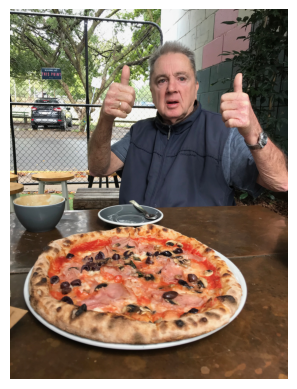

In [ ]:
# process the image

# since we have created a function to view we can utillize to see the image and get tensor data

import matplotlib.image as mimg
img = mimg.imread("04-pizza-dad.jpeg")
plt.imshow(img)
img = img/255.
img = tf.expand_dims(img,axis = 0)
plt.axis(False)
img.shape

In [ ]:
def load_and_prep(filename,image_shape=(224,224)):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=image_shape)
  img = img/255.
  img = tf.expand_dims(img,axis = 0)
  return img


In [ ]:
img = load_and_prep("04-pizza-dad.jpeg")

In [ ]:
model_2.predict(img)

1/1 [==============================] - 0s 69ms/step


array([[0.27640778]], dtype=float32)

In [ ]:
def predict(model,filename,classes=class_names):
  img = load_and_prep(filename)

  pred = model.predict(img)

  label = classes[int(np.round(pred[0]))]

  plt.title(label);
  plt.imshow(tf.image.decode_image(tf.io.read_file(filename)));
  plt.axis(False);




1/1 [==============================] - 0s 20ms/step


<ipython-input-84-8377228deb5e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = classes[int(np.round(pred[0]))]


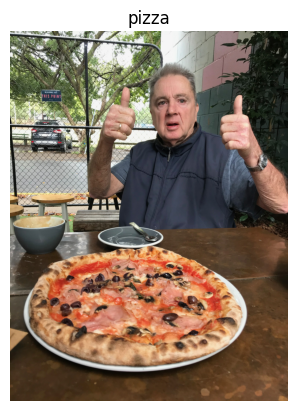

In [ ]:
predict(model_2,"04-pizza-dad.jpeg")

https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg


In [ ]:
!wget  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-steak.jpeg

--2024-07-18 16:56:02--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-18 16:56:02 ERROR 404: Not Found.



## 6.Adjust the hyperparameters
* depends on our model , if it overfits or underfits

* if overfits we can do the following:
      * using more data for training
      *  using data augmentation
      * using transer learning
      * increasing `Conv2D` or `MaxPool2D` to decrease the trainable params

### let's work on first changing activation function and later increasing layers

In [ ]:
model_3 =Sequential([
    Conv2D(10,3,activation = "tanh"),
    Conv2D(10,3,activation = "tanh"),
    MaxPool2D(),
    Conv2D(10,3,activation = "tanh"),
    Conv2D(10,3,activation = "tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")

])

model_3.compile(loss ="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 0.6007 - accuracy: 0.7033 - val_loss: 0.4690 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4862 - accuracy: 0.7767 - val_loss: 0.4375 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4308 - accuracy: 0.8180 - val_loss: 0.3967 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3797 - accuracy: 0.8433 - val_loss: 0.4006 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3327 - accuracy: 0.8700 - val_loss: 0.3978 - val_accuracy: 0.8180


In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 92ms/step - loss: 0.3198 - accuracy: 0.8640


[0.3198225796222687, 0.8640000224113464]

In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 110ms/step - loss: 0.3978 - accuracy: 0.8180


[0.39776119589805603, 0.8180000185966492]

### Let's add more filters and less kernel size

In [ ]:
model_4 = Sequential([
    Conv2D(15,2,activation = "tanh", input_shape = (224,224,3)),
    Conv2D(15,2, activation = "tanh"),
    MaxPool2D(),
    Conv2D(15,2, activation = "tanh"),
    Conv2D(15,2,activation = "tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 0.5708 - accuracy: 0.7013 - val_loss: 0.5157 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4523 - accuracy: 0.7913 - val_loss: 0.3921 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4144 - accuracy: 0.8100 - val_loss: 0.4201 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3753 - accuracy: 0.8460 - val_loss: 0.4474 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3783 - accuracy: 0.8407 - val_loss: 0.4077 - val_accuracy: 0.8140


In [ ]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 conv2d_44 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 conv2d_46 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                

In [ ]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 223, 223, 15)      195       
                                                                 
 conv2d_48 (Conv2D)          (None, 222, 222, 15)      915       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 15)      0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 110, 110, 15)      915       
                                                                 
 conv2d_50 (Conv2D)          (None, 109, 109, 15)      915       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 15)        0         
 ng2D)                                               

### Only changing filters and kernel size

In [ ]:
model_5 = Sequential([
    Conv2D(15,3,activation = "relu", input_shape = (224,224,3)),
    Conv2D(15,2, activation = "relu"),
    MaxPool2D(),
    Conv2D(15,2,activation  = "relu"),
    Conv2D(15,2,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.5256 - accuracy: 0.7300 - val_loss: 0.4160 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4281 - accuracy: 0.8147 - val_loss: 0.3763 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3926 - accuracy: 0.8340 - val_loss: 0.3044 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3709 - accuracy: 0.8447 - val_loss: 0.3588 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3275 - accuracy: 0.8660 - val_loss: 0.3177 - val_accuracy: 0.8580


In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 77ms/step - loss: 0.3177 - accuracy: 0.8580


[0.3177104890346527, 0.8579999804496765]

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.3198 - accuracy: 0.8640


[0.31982260942459106, 0.8640000224113464]

### Increase the layers

In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
history_6 = model_6.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 126ms/step - loss: 0.6000 - accuracy: 0.6640 - val_loss: 0.4237 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4718 - accuracy: 0.7827 - val_loss: 0.3940 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4256 - accuracy: 0.8093 - val_loss: 0.3877 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4096 - accuracy: 0.8160 - val_loss: 0.4018 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3795 - accuracy: 0.8360 - val_loss: 0.3426 - val_accuracy: 0.8580


In [ ]:
model_7 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
history_7 = model_7.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 146ms/step - loss: 0.6274 - accuracy: 0.6400 - val_loss: 0.4927 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4879 - accuracy: 0.7793 - val_loss: 0.5289 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4385 - accuracy: 0.8020 - val_loss: 0.3997 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3748 - accuracy: 0.8440 - val_loss: 0.4538 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3402 - accuracy: 0.8593 - val_loss: 0.3879 - val_accuracy: 0.8360


> 🔑 **Note : ** Due to increase in more layers trainable parameter decreases from model_6 to model_7 , hence no improvement

In [ ]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_56 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_57 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 109, 109, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 107, 107, 10)      910       
                                                                 
 conv2d_59 (Conv2D)          (None, 105, 105, 10)      910       
                                                     

In [ ]:
model_7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_62 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_63 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 109, 109, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 107, 107, 10)      910       
                                                                 
 conv2d_65 (Conv2D)          (None, 105, 105, 10)      910       
                                                     

### Increasing Epochs for `model_2` , `model_4` and `model_5`

In [ ]:
history_2 = model_2.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 7s 143ms/step - loss: 0.3295 - accuracy: 0.8653 - val_loss: 0.3785 - val_accuracy: 0.8340
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 0.2962 - accuracy: 0.8780 - val_loss: 0.3146 - val_accuracy: 0.8620
Epoch 3/10
47/47 [==============================] - 7s 145ms/step - loss: 0.2378 - accuracy: 0.9147 - val_loss: 0.3275 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 7s 146ms/step - loss: 0.2061 - accuracy: 0.9227 - val_loss: 0.3120 - val_accuracy: 0.8760
Epoch 5/10
47/47 [==============================] - 5s 115ms/step - loss: 0.1469 - accuracy: 0.9467 - val_loss: 0.3614 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 5s 113ms/step - loss: 0.1063 - accuracy: 0.9660 - val_loss: 0.4331 - val_accuracy: 0.8300
Epoch 7/10
47/47 [==============================] - 7s 146ms/step - loss: 0.0732 - accuracy: 0.9800 - val_loss: 0.5492 - val_accuracy: 0.8320
Epoch 

In [ ]:
history_4 = model_4.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 7s 145ms/step - loss: 0.2704 - accuracy: 0.8953 - val_loss: 0.4330 - val_accuracy: 0.7940
Epoch 2/10
47/47 [==============================] - 5s 113ms/step - loss: 0.2136 - accuracy: 0.9313 - val_loss: 0.4237 - val_accuracy: 0.7960
Epoch 3/10
47/47 [==============================] - 7s 143ms/step - loss: 0.1578 - accuracy: 0.9540 - val_loss: 0.4992 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 5s 110ms/step - loss: 0.1065 - accuracy: 0.9740 - val_loss: 0.4858 - val_accuracy: 0.7860
Epoch 5/10
47/47 [==============================] - 7s 152ms/step - loss: 0.0605 - accuracy: 0.9927 - val_loss: 0.5340 - val_accuracy: 0.7940
Epoch 6/10
47/47 [==============================] - 5s 115ms/step - loss: 0.0387 - accuracy: 0.9960 - val_loss: 0.5802 - val_accuracy: 0.7880
Epoch 7/10
47/47 [==============================] - 5s 114ms/step - loss: 0.0220 - accuracy: 0.9993 - val_loss: 0.6114 - val_accuracy: 0.7960
Epoch 

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 5s 113ms/step - loss: 0.2965 - accuracy: 0.8853 - val_loss: 0.3907 - val_accuracy: 0.8180
Epoch 2/10
47/47 [==============================] - 7s 138ms/step - loss: 0.2451 - accuracy: 0.9093 - val_loss: 0.3467 - val_accuracy: 0.8480
Epoch 3/10
47/47 [==============================] - 6s 133ms/step - loss: 0.1750 - accuracy: 0.9473 - val_loss: 0.3496 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 7s 141ms/step - loss: 0.1080 - accuracy: 0.9653 - val_loss: 0.4983 - val_accuracy: 0.8120
Epoch 5/10
47/47 [==============================] - 7s 145ms/step - loss: 0.0785 - accuracy: 0.9820 - val_loss: 0.5052 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 5s 113ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.3910 - val_accuracy: 0.8640
Epoch 7/10
47/47 [==============================] - 7s 144ms/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 0.4883 - val_accuracy: 0.8560
Epoch 

### > ALL the above models are overfitted , by longer epochs so to improve we can decrease epoch or change steps per epoch

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.6533 - accuracy: 0.8320


[0.6532890200614929, 0.8320000171661377]

import pandas as pd

!pip uninstall pandas
!pip install pandas

In [ ]:
model_2.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data)*0.7,
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
32/32 [==============================] - 6s 171ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.6022 - val_accuracy: 0.8600
Epoch 2/10
32/32 [==============================] - 5s 165ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.6404 - val_accuracy: 0.8580
Epoch 3/10
32/32 [==============================] - 4s 129ms/step - loss: 0.0245 - accuracy: 0.9905 - val_loss: 0.6778 - val_accuracy: 0.8420
Epoch 4/10
32/32 [==============================] - 5s 147ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.7114 - val_accuracy: 0.8280
Epoch 5/10
32/32 [==============================] - 5s 136ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.7154 - val_accuracy: 0.8540
Epoch 6/10
32/32 [==============================] - 4s 130ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7441 - val_accuracy: 0.8600
Epoch 7/10
32/32 [==============================] - 6s 181ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7635 - val_accuracy: 0.8600
Epoch 

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.8192 - accuracy: 0.8500


[0.8191918730735779, 0.8500000238418579]

In [ ]:
model_4.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data)*0.7,
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
32/32 [==============================] - 6s 173ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6977 - val_accuracy: 0.7860
Epoch 2/10
32/32 [==============================] - 4s 135ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7028 - val_accuracy: 0.7880
Epoch 3/10
32/32 [==============================] - 4s 129ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7225 - val_accuracy: 0.7900
Epoch 4/10
32/32 [==============================] - 5s 162ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7274 - val_accuracy: 0.7880
Epoch 5/10
32/32 [==============================] - 4s 132ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.7446 - val_accuracy: 0.7920
Epoch 6/10
32/32 [==============================] - 5s 164ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7508 - val_accuracy: 0.7900
Epoch 7/10
32/32 [==============================] - 4s 134ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7591 - val_accuracy: 0.7900
Epoch 

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data)*0.7,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
32/32 [==============================] - 6s 189ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.6516 - val_accuracy: 0.8480
Epoch 2/10
32/32 [==============================] - 4s 130ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.5673 - val_accuracy: 0.8520
Epoch 3/10
32/32 [==============================] - 5s 167ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6208 - val_accuracy: 0.8520
Epoch 4/10
32/32 [==============================] - 4s 130ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6189 - val_accuracy: 0.8660
Epoch 5/10
32/32 [==============================] - 4s 127ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6223 - val_accuracy: 0.8680
Epoch 6/10
32/32 [==============================] - 5s 167ms/step - loss: 8.7742e-04 - accuracy: 1.0000 - val_loss: 0.6459 - val_accuracy: 0.8600
Epoch 7/10
32/32 [==============================] - 4s 130ms/step - loss: 8.1639e-04 - accuracy: 1.0000 - val_loss: 0.6474 - val_accuracy: 0.864

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 91ms/step - loss: 0.7820 - accuracy: 0.7860


[0.7820333242416382, 0.7860000133514404]

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.6751 - accuracy: 0.8600


[0.6751274466514587, 0.8600000143051147]

## Data Augmentation
It means creating image data by manipulating them like zooming , rotating , croping , shifting etc

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1./255 ,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size = 32,
                                                                   target_size = (224,224),
                                                                   class_mode = "binary",
                                                                   shuffle = True) # default True , shuffling the data is very important


Found 1500 images belonging to 2 classes.


In [ ]:
model_2.fit(train_data_augmented,
            epochs = 10,
            steps_per_epoch = len(train_data_augmented)*0.7,
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
32/32 [==============================] - 17s 515ms/step - loss: 0.8088 - accuracy: 0.7101 - val_loss: 0.4396 - val_accuracy: 0.8240
Epoch 2/10
32/32 [==============================] - 19s 589ms/step - loss: 0.4979 - accuracy: 0.7576 - val_loss: 0.3400 - val_accuracy: 0.8560
Epoch 3/10
32/32 [==============================] - 17s 512ms/step - loss: 0.4772 - accuracy: 0.7955 - val_loss: 0.3355 - val_accuracy: 0.8640
Epoch 4/10
32/32 [==============================] - 17s 525ms/step - loss: 0.4380 - accuracy: 0.8078 - val_loss: 0.2924 - val_accuracy: 0.8880
Epoch 5/10
32/32 [==============================] - 16s 491ms/step - loss: 0.4455 - accuracy: 0.7842 - val_loss: 0.3047 - val_accuracy: 0.8860
Epoch 6/10
32/32 [==============================] - 17s 510ms/step - loss: 0.4233 - accuracy: 0.8279 - val_loss: 0.3176 - val_accuracy: 0.8720
Epoch 7/10
32/32 [==============================] - 17s 506ms/step - loss: 0.4375 - accuracy: 0.8099 - val_loss: 0.3048 - val_accuracy: 0.8780

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 106ms/step - loss: 0.3755 - accuracy: 0.8440


[0.3755314350128174, 0.843999981880188]

# Large Example

Working with 10_food_classes from kaggle

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-07-18 17:49:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  2.89MB/s    in 7.4s    

2024-07-18 17:49:08 (67.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



# [10_food_classes_all_data.zip](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)







In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

## Becoming one with Data

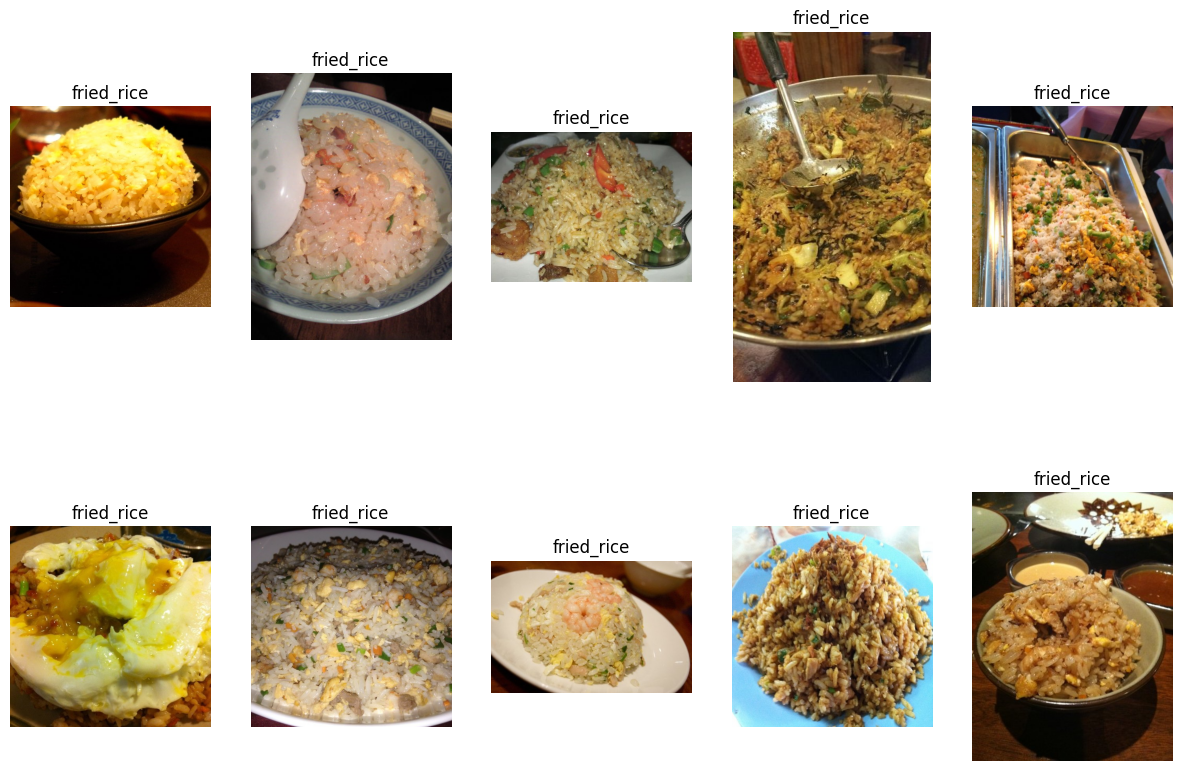

In [ ]:
img = view_images(target_dir = "10_food_classes_all_data/train", target_class = "fried_rice")

## Preprocessing the Data

In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
train_datagen_10_food_classes = image_dataset_from_directory(directory = train_dir,
                                                             batch_size = 32,
                                                             seed = 123,
                                                             image_size = (224,224))

Found 7500 files belonging to 10 classes.


In [ ]:
test_datagen_10_food_classes = image_dataset_from_directory(directory = test_dir,
                                                             batch_size = 32,
                                                             seed = 123,
                                                             image_size = (224,224))

Found 2500 files belonging to 10 classes.


In [ ]:
normalized_layer = tf.keras.layers.Rescaling(1/255.)

In [ ]:
train_data_10_food_classes = train_datagen_10_food_classes.map(lambda x,y : (normalized_layer(x),y))
test_data_10_food_classes = test_datagen_10_food_classes.map(lambda x,y : (normalized_layer(x),y))

img , lab = train_data_10_food_classes.as_numpy_iterator().next()

In [ ]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = "softmax")])

model_8.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_8.fit(train_data_10_food_classes,
            epochs = 5,
            steps_per_epoch = len(train_data_10_food_classes),
            validation_data = test_data_10_food_classes,
            validation_steps = len(test_data_10_food_classes))

Epoch 1/5
235/235 [==============================] - 552s 2s/step - loss: 1.9275 - accuracy: 0.3243 - val_loss: 2.0308 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 569s 2s/step - loss: 1.7545 - accuracy: 0.4039 - val_loss: 1.8644 - val_accuracy: 0.3528
Epoch 3/5
235/235 [==============================] - 539s 2s/step - loss: 1.4265 - accuracy: 0.5145 - val_loss: 2.0993 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 535s 2s/step - loss: 0.9385 - accuracy: 0.6909 - val_loss: 2.8905 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 565s 2s/step - loss: 0.4701 - accuracy: 0.8531 - val_loss: 4.0295 - val_accuracy: 0.2648


### saving model

In [ ]:
model_8.save("model_8__10_food_classes.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### load model

In [ ]:
loaded_model = tf.keras.models.load_model("model_8__10_food_classes.h5")

In [ ]:
loaded_model.evaluate(test_data_10_food_classes)

79/79 [==============================] - 58s 714ms/step - loss: 4.0295 - accuracy: 0.2648


[4.029540061950684, 0.2648000121116638]